# Iris Dataset
## Introduction
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

###Features:
1. SepalLengthCm
2.  SepalWidthCm
3.  PetalLengthCm
4. PetalWidthCm

###Target:
1.   variety


# Loding Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loding Data in DataFrame

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv'])) # Dataset is now stored in a Pandas Dataframe 

In [4]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# Plotting Graph

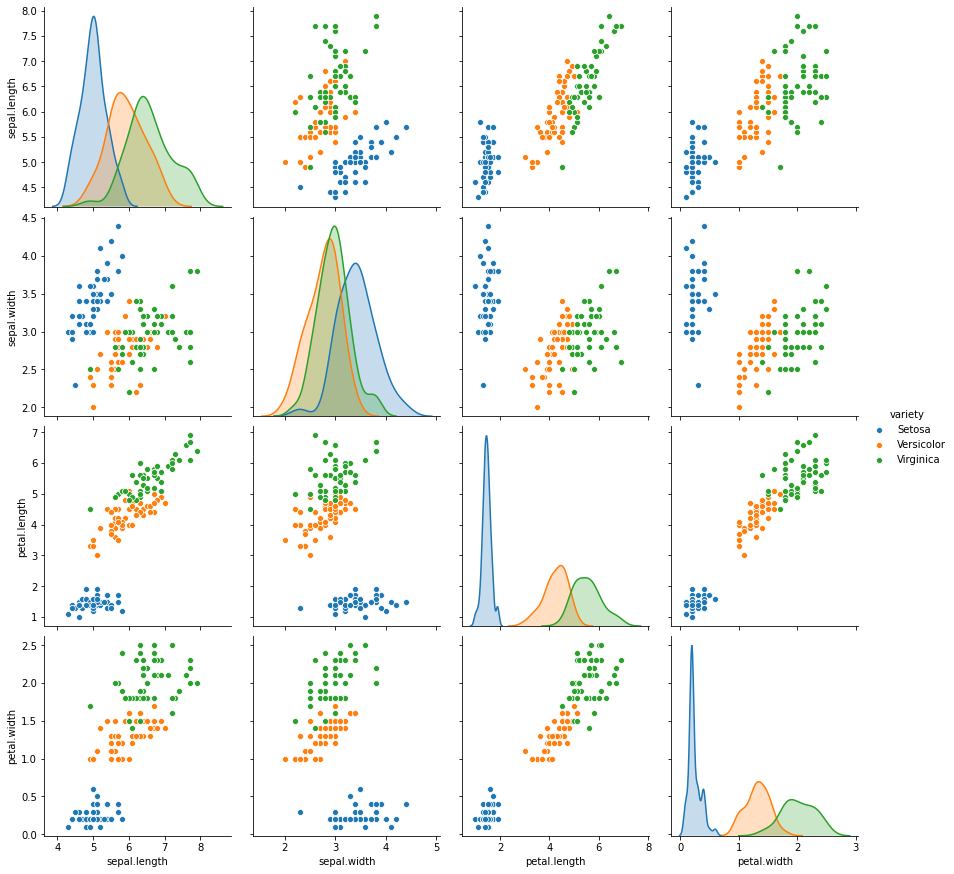

In [5]:
sns.pairplot(df, hue="variety", size=3, diag_kind="kde");

#Feature Extraction and Test-Train-Split 


In [6]:
df = df.replace(['Iris-versicolor','Iris-virginica','Iris-setosa'],[0, 1, 2])
X  = df.drop("variety",axis=1)
y  = df["variety"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Importing Models (Algorithms)

In [8]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [9]:
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=3)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

# Train and Test Models (Algorithms)

In [10]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [11]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred, average='weighted') 
    print(pred_val[a])

0.9599166666666668
0.98
0.8978835978835978
0.98
0.98


#Ploating Graph for better Visualization

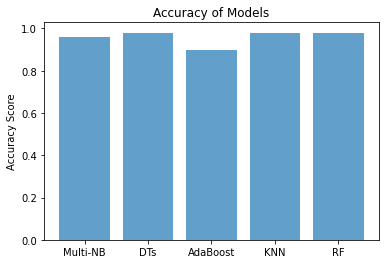

In [12]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

# Conclusion

Best result is achived using Decision Trees classifier, Nearest Neighbors classifier and Random Forest classifier.